In [ ]:
#NOTE:
#YEAR 2019 MONTHLY
# Pedestrian activity increases as the number of Victorian full-time workers increases.

In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from keys import api_key
from matplotlib import pyplot as plt


In [ ]:
client = Socrata("data.melbourne.vic.gov.au", api_key)


for yr in [2019,2020,2021]:
    results = client.get("b2ak-trbp", limit=800000,year=yr)
    # Convert to pandas DataFrame
    globals()[f'results_df{yr}'] = pd.DataFrame.from_records(results)
    print(f'results_df{yr}')

In [24]:
results = client.get("b2ak-trbp", limit=800000,year=2021)
    # Convert to pandas DataFrame
results_df2021= pd.DataFrame.from_records(results)


In [130]:
results_df2020.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts,daily_Count
0,2966839,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,4,Town Hall (West),3120,0
1,2966840,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,17,Collins Place (South),945,0
2,2966841,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,18,Collins Place (North),464,0
3,2966842,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,53,Collins St (North),1590,0
4,2966843,2020-01-01T00:00:00.000,2020,January,1,Wednesday,0,2,Bourke Street Mall (South),725,0


In [129]:
results_df2019.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts,daily_Count
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300,0
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604,0
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216,0
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627,0
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774,0


In [27]:
results_df2021.head()
results_df2019["month"].unique()

array(['November', 'September', 'October', 'December', 'August',
       'January', 'February', 'March', 'May', 'April', 'June', 'July'],
      dtype=object)

In [124]:
print(results_df2021["sensor_id"].unique())
print(results_df2021["sensor_id"].shape)

['4' '17' '18' '53' '2' '1' '3' '15' '9' '10' '12' '11' '8' '7' '5' '6'
 '14' '26' '24' '23' '25' '21' '20' '19' '22' '27' '28' '31' '30' '34'
 '39' '37' '40' '36' '29' '42' '43' '44' '35' '45' '41' '46' '47' '48'
 '49' '50' '51' '52' '54' '55' '56' '57' '58' '59' '61' '62' '63' '64'
 '65' '66' '67' '68' '69' '70' '71' '73' '72' '75' '76' '77' '78']
(377393,)


In [125]:
print(results_df2020["sensor_id"].unique())
print(results_df2020["sensor_id"].shape)

['4' '17' '18' '53' '2' '1' '3' '15' '9' '10' '12' '11' '8' '7' '5' '6'
 '14' '26' '24' '23' '25' '21' '20' '19' '22' '27' '28' '31' '30' '34'
 '39' '37' '40' '36' '29' '42' '43' '44' '35' '45' '41' '46' '47' '48'
 '49' '50' '51' '52' '54' '55' '56' '57' '58' '59' '61' '62' '63' '64'
 '65' '66' '67' '68' '69' '70' '71' '73']
(516100,)


In [126]:
print(results_df2019["sensor_id"].unique())
print(results_df2019["sensor_id"].shape)

['34' '39' '37' '40' '36' '29' '42' '43' '44' '35' '45' '46' '47' '48'
 '49' '50' '51' '52' '54' '55' '56' '57' '58' '59' '61' '62' '4' '17' '18'
 '53' '2' '1' '3' '15' '9' '10' '12' '11' '8' '7' '5' '6' '14' '26' '24'
 '23' '25' '21' '20' '19' '22' '27' '28' '31' '30' '41' '33' '60']
(456829,)


In [28]:
results_df2019.to_csv('results_df2019.csv',index=False)
results_df2020.to_csv('results_df2020.csv',index=False)
results_df2021.to_csv('results_df2021.csv',index=False)

In [3]:
results_df2019=pd.read_csv("results_df2019.csv") 
results_df2020=pd.read_csv("results_df2020.csv") 
results_df2021=pd.read_csv("results_df2021.csv") 

In [4]:
#Data Pre Processing
results_df2019=results_df2019.dropna(how="any")
results_df2019.shape
results_df2019["hourly_counts"]=pd.to_numeric(results_df2019["hourly_counts"])

In [5]:
results_df2020=results_df2020.dropna(how="any")
results_df2020.shape
results_df2020["hourly_counts"]=pd.to_numeric(results_df2020["hourly_counts"])

In [6]:
results_df2021=results_df2021.dropna(how="any")
results_df2021.shape
results_df2021["hourly_counts"]=pd.to_numeric(results_df2021["hourly_counts"])

In [7]:
#count per day
results_df2019["daily_Count"]=0
per_day_count=results_df2019.groupby(["sensor_name","month","day"])["hourly_counts"].sum()

results_df2019_perdayCount=per_day_count.reset_index()
results_df2019_perdayCount

,sensor_name,month,day,hourly_counts
0,Alfred Place,April,Friday,29607
1,Alfred Place,April,Monday,37167
2,Alfred Place,April,Saturday,11889
3,Alfred Place,April,Sunday,8249
4,Alfred Place,April,Thursday,30234
...,...,...,...,...
4496,Webb Bridge,September,Saturday,12114
4497,Webb Bridge,September,Sunday,13074
4498,Webb Bridge,September,Thursday,23660
4499,Webb Bridge,September,Tuesday,23140


In [8]:
#count per day
results_df2020["daily_Count"]=0
per_day_count2020=results_df2020.groupby(["sensor_name","month","day"])["hourly_counts"].sum()

results_df2020_perdayCount=per_day_count2020.reset_index()
results_df2020_perdayCount

,sensor_name,month,day,hourly_counts
0,231 Bourke St,April,Friday,8871
1,231 Bourke St,April,Monday,8566
2,231 Bourke St,April,Saturday,5874
3,231 Bourke St,April,Sunday,5047
4,231 Bourke St,April,Thursday,11829
...,...,...,...,...
5060,Westwood Place,October,Saturday,648
5061,Westwood Place,October,Sunday,253
5062,Westwood Place,October,Thursday,849
5063,Westwood Place,October,Tuesday,900


In [9]:
#count per day
results_df2021["daily_Count"]=0
per_day_count=results_df2021.groupby(["sensor_name","month","day"])["hourly_counts"].sum()

results_df2021_perdayCount=per_day_count.reset_index()
results_df2021_perdayCount

,sensor_name,month,day,hourly_counts
0,231 Bourke St,April,Friday,52133
1,231 Bourke St,April,Monday,27838
2,231 Bourke St,April,Saturday,47261
3,231 Bourke St,April,Sunday,32831
4,231 Bourke St,April,Thursday,45070
...,...,...,...,...
3686,Westwood Place,May,Saturday,4026
3687,Westwood Place,May,Sunday,3566
3688,Westwood Place,May,Thursday,3816
3689,Westwood Place,May,Tuesday,3986


In [10]:
results_df2021_perdayCount.shape
results_df2021_perdayCount.shape

(3691, 4)

In [136]:
#Merge all the df
merged_2019_2020_df=pd.merge(results_df2019_perdayCount,results_df2020_perdayCount,on=["sensor_name","month","day"],suffixes=("_2019","_2020"),how="outer")

merged_2019_2020_df["month"].unique()
merged_2019_2020_df=merged_2019_2020_df.rename(columns={'hourly_counts_2019':'day_based_counts2019',
                                                                 'hourly_counts_2020':'day_based_counts2020'})
merged_2019_2020_df["month"].unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [12]:
#Merge all the df
#merged_2019_2020_df=pd.merge(results_df2019_perdayCount,results_df2020_perdayCount,on=["sensor_name","month","day"],suffixes=("_2019","_2020"))

In [137]:
#Merge all the df
merged_2019_2020_2021_df=pd.merge(merged_2019_2020_df,results_df2021_perdayCount,on=["sensor_name","month","day"],how="outer")
merged_2019_2020_2021_df.dropna(how="any",inplace=True)
merged_2019_2020_2021_df=merged_2019_2020_2021_df.rename(columns={'hourly_counts':'day_based_counts2021'})
merged_2019_2020_2021_df["month"].unique()

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May'], dtype=object)

In [25]:
#remove datapoints whose sensors are not same - for benchmarking
#df=pd.merge(results_df2019,results_df2020,on=["sensor_id","sensor_name","mdate","month"],suffixes=("_2019","_2020"))

In [181]:
#================================PLOTS================================

In [138]:
#common sensors across the db
a=merged_2019_2020_2021_df["sensor_name"].unique().tolist()
print(a)
len(a)


['Alfred Place', 'Birrarung Marr', 'Bourke St - Spencer St (North)', 'Bourke St Bridge', 'Bourke St-Russell St (West)', 'Bourke Street Mall (North)', 'Bourke Street Mall (South)', 'Chinatown-Lt Bourke St (South)', 'Chinatown-Swanston St (North)', 'Collins Place (North)', 'Collins Place (South)', 'Collins St (North)', 'Elizabeth St-Lonsdale St (South)', 'Faraday St-Lygon St (West)', 'Flinders St-Elizabeth St (East)', 'Flinders St-Spark La', 'Flinders Street Station Underpass', 'Grattan St-Swanston St (West)', 'Lincoln-Swanston(West)', 'Little Collins St-Swanston St (East)', 'Lonsdale St (South)', 'Lonsdale St - Elizabeth St (North)', 'Lonsdale St-Spring St (West)', 'Lygon St (East)', 'Lygon St (West)', 'Melbourne Central', 'Melbourne Central-Elizabeth St (East)', 'Melbourne Convention Exhibition Centre', 'Monash Rd-Swanston St (West)', 'New Quay', 'Pelham St (S)', 'Princes Bridge', 'QV Market-Elizabeth St (West)', 'QV Market-Peel St', 'QVM-Franklin St (North)', 'QVM-Queen St (East)', 'Q

53

In [139]:
merged_2019_2020_df["month"].unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [140]:
#monday_df.groupby(["sensor_name","month"]).day_based_counts2021.value_counts().unstack(0).plot.bar()
#sortedA=merged_2019_2020_2021_df.sort_values('month')
#print(sortedA)
month_count2021_df=merged_2019_2020_2021_df.groupby(["month"])["day_based_counts2021"].sum()
month_count2021_df.head()
month_count2019_df=merged_2019_2020_df.groupby(["month"])["day_based_counts2019"].sum()
month_count2019_df.head()
month_count2020_df=merged_2019_2020_df.groupby(["month"])["day_based_counts2020"].sum()
month_count2020_df.head()

month
April        3965628.0
August       3157701.0
December    14153423.0
February    21853368.0
January     23189121.0
Name: day_based_counts2020, dtype: float64

In [147]:
month_count2019_20_df=merged_2019_2020_df.groupby(["month"])["day_based_counts2019","day_based_counts2020"].sum()
month_count2019_20_df.head()
df=month_count2019_20_df.reset_index()

In [148]:
sorted_months=["January","February","March","April","May","June","July","August", "September", "October","November", "December"]
df.index=pd.CategoricalIndex(df["month"],categories=sorted_months,ordered=True)
df.sort_index()
df

,month,day_based_counts2019,day_based_counts2020
month,,,
April,April,22818120.0,3965628.0
August,August,23896524.0,3157701.0
December,December,24931172.0,14153423.0
February,February,18816254.0,21853368.0
January,January,18904686.0,23189121.0
July,July,22744685.0,5394964.0
June,June,20194222.0,8573779.0
March,March,23181242.0,16576373.0
May,May,21590920.0,6257626.0


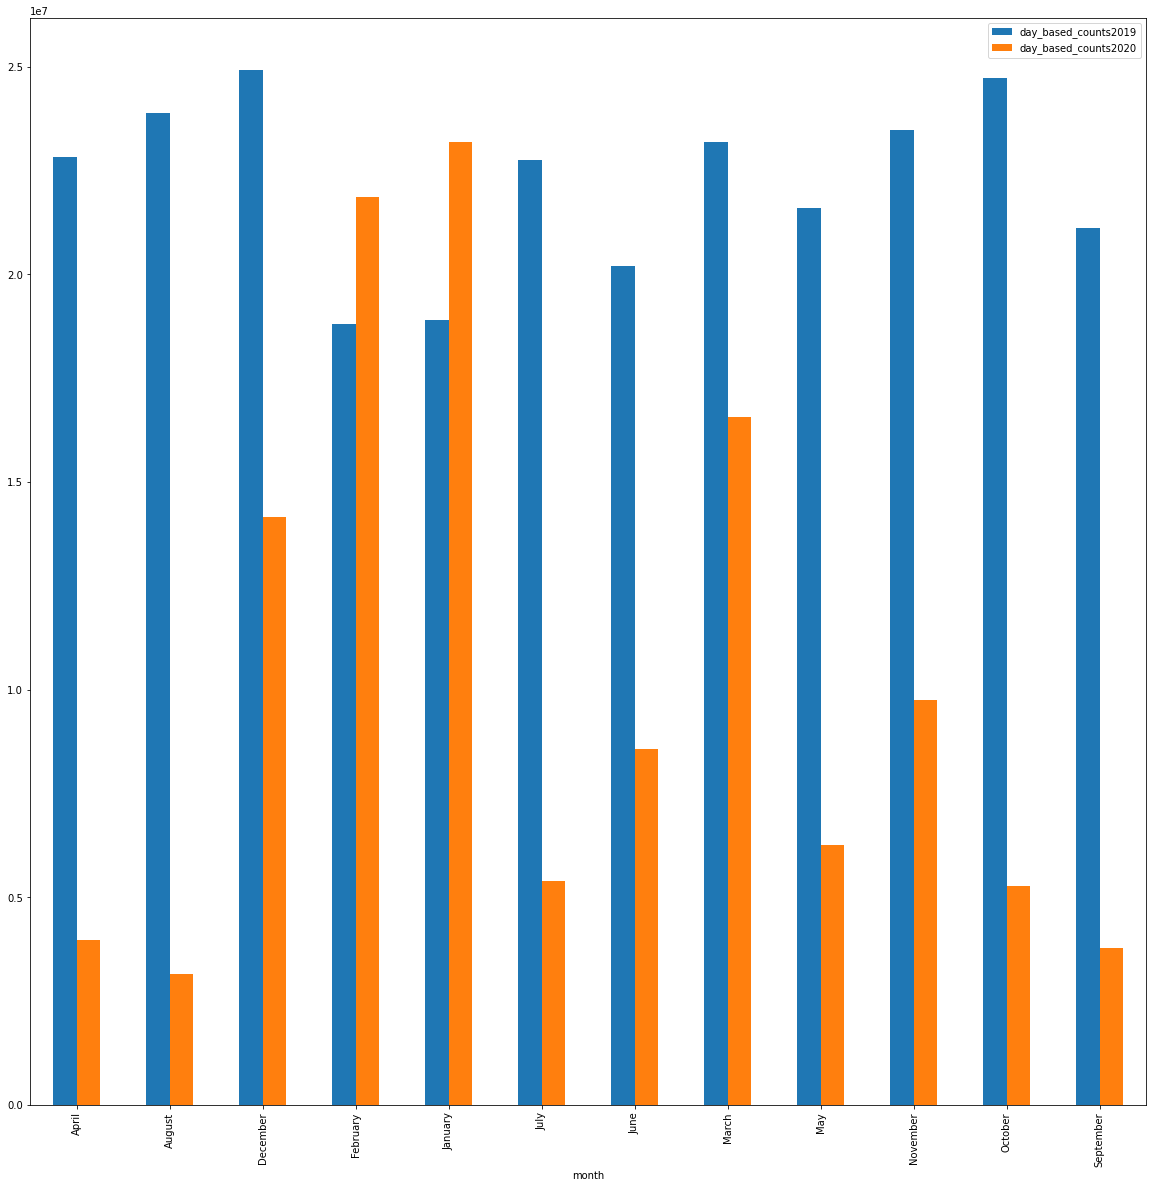

In [133]:
b1=month_count2019_20_df.plot(kind="bar",figsize=[20,20])

In [118]:
fig = b1.get_figure()
fig.savefig('2019_2020Bar.png')

In [ ]:
#Trend change across each sensor


In [57]:
#Total number of sensors
results_df2019["sensor_name"].value_counts()

Town Hall (West)                         8760
Southern Cross Station                   8760
Monash Rd-Swanston St (West)             8760
Spencer St-Collins St (South)            8760
Lygon St (East)                          8760
                                         ... 
Elizabeth St-La Trobe St (East)          2208
La Trobe St (North)                      2208
Flinders La-Swanston St (West)           1848
Flinders La - Swanston St (West) Temp    1379
Flinders la - Swanston St (West) Temp     912
Name: sensor_name, Length: 61, dtype: int64

In [45]:
per_day
per_day.plot(kind="line")

TypeError: no numeric data to plot

In [ ]:
#Group by sensor name scross 3 years
results_df2019.groupby(["sensor_name"][""])